# Рубежный контроль 1

## Тема: Технологии разведочного анализа и обработки данных.

### Вариант 8

Задача 1, датасет 8. 
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.


Датасет https://www.kaggle.com/lava18/google-play-store-apps

Задание для студентов группы ИУ5-65Б - для набора данных построить "парные диаграммы".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('gps_data.csv', sep=",")

In [3]:
data.shape

(10841, 13)

In [4]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Видно, что есть пропуски, а значит датасет пока непригоден.

Поскольку рейтинг - количественный параметр, лучше будет удалить строки с отсутствующим рейтингом, тем более что их немного. То же самое можно сказать и об остальных пропусках.

In [6]:
data_new = data.dropna(axis=0, how='any')
print(f"было удалено {data.shape[0]-data_new.shape[0]} строк")

было удалено 1481 строк


In [7]:
data_new.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Пропусков больше нет. Однако появляется проблема, в датасете всего 1 численное поле. Поэтому нужно перевести остальные поля в численный формат.

In [8]:
data_new.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
data_new.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [10]:
#мы не пишем обратно в датасеты, поэтому игнорируем предупреждение об изменении в копии
pd.options.mode.chained_assignment = None

In [11]:
#переводим количество ревью в числа
data_new.loc[:, 'Reviews']=pd.to_numeric(data_new.loc[:, 'Reviews'])

In [12]:
#переводим количество загрузок в числа
data_new.loc[:, 'Installs'] = data_new.loc[:, 'Installs'].str.replace(',','')
data_new.loc[:, 'Installs'] = data_new.loc[:, 'Installs'].map(lambda x: str(x).rstrip('+'))
data_new.loc[:, 'Installs'] = pd.to_numeric(data_new.loc[:, 'Installs'], errors='coerce', downcast='float')

In [13]:
#переводим цену в числа
data_new.loc[:, 'Price'] = data_new.loc[:, 'Price'].map(lambda x: str(x).lstrip('$'))
data_new.loc[:, 'Price'] = pd.to_numeric(data_new.loc[:, 'Price'], errors='coerce', downcast='float')

In [14]:
#переводим размер в числа
data_new.loc[:, 'Size'] = data_new.loc[:, 'Size'].str.replace(',','')
data_new.loc[:, 'Size'] = data_new.loc[:, 'Size'].map(lambda x: str(x).rstrip('M'))

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
#заменяем varies vith device на среднее
data_new.loc[:, 'Size'] = pd.to_numeric(data_new.loc[:, 'Size'], errors='coerce', downcast='float')
temp_data = data_new[['Size']]   
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(temp_data)   
imp_num = SimpleImputer(strategy='mean')
data_num_imp = imp_num.fit_transform(temp_data)
filled_data = data_num_imp[mask_missing_values_only]
data_new = data_new.replace(np.nan, filled_data[0])

In [17]:
#создаем уникальные значения категорий
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(data_new.loc[:, 'Category'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data_new.loc[:, 'Category'] = cat_enc_le

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FAMILY' 'FINANCE' 'FOOD_AND_DRINK' 'GAME' 'HEALTH_AND_FITNESS'
 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'MAPS_AND_NAVIGATION'
 'MEDICAL' 'NEWS_AND_MAGAZINES' 'PARENTING' 'PERSONALIZATION'
 'PHOTOGRAPHY' 'PRODUCTIVITY' 'SHOPPING' 'SOCIAL' 'SPORTS' 'TOOLS'
 'TRAVEL_AND_LOCAL' 'VIDEO_PLAYERS' 'WEATHER']


In [18]:
#создаем уникальные значения аудиторий
cat_enc_le = le.fit_transform(data_new.loc[:, 'Content Rating'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data_new.loc[:, 'Content Rating'] = cat_enc_le

['Adults only 18+' 'Everyone' 'Everyone 10+' 'Mature 17+' 'Teen' 'Unrated']


In [19]:
#создаем уникальные значения типа
cat_enc_le = le.fit_transform(data_new.loc[:, 'Type'])
print(le.inverse_transform(np.unique(cat_enc_le)))
data_new.loc[:, 'Type'] = cat_enc_le

['Free' 'Paid']


In [20]:
data_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000.0,0,0.0,1,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,0,3.9,967,14.0,500000.0,0,0.0,1,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000.0,0,0.0,1,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000.0,0,0.0,4,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000.0,0,0.0,1,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Теперь все строки без пропусков и переведены в числовой формат**

In [21]:
data_new.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
data_new.dtypes

App                object
Category            int32
Rating            float64
Reviews             int64
Size              float32
Installs          float32
Type                int32
Price             float32
Content Rating      int32
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Уберем колонки Genres, Last Updated, Current Ver и Android Ver, тк. версии особой информации не несут, а жанры - колонка с множеством значений, и чтобы построить анализ по ней необходимо перестраивать таблицу. 

In [23]:
data_new.drop(columns=['Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.000000,10000.0,0,0.0,1
1,Coloring book moana,0,3.9,967,14.000000,500000.0,0,0.0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.700000,5000000.0,0,0.0,1
3,Sketch - Draw & Paint,0,4.5,215644,25.000000,50000000.0,0,0.0,4
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.800000,100000.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,11,4.0,7,2.600000,500.0,0,0.0,1
10836,Sya9a Maroc - FR,11,4.5,38,53.000000,5000.0,0,0.0,1
10837,Fr. Mike Schmitz Audio Teachings,11,5.0,4,3.600000,100.0,0,0.0,1
10839,The SCP Foundation DB fr nn5n,3,4.5,114,23.746319,1000.0,0,0.0,3


### теперь проедем кореляционный анализ.

<AxesSubplot:>

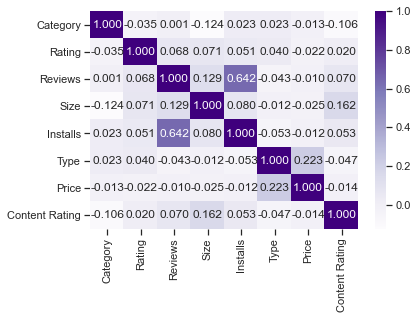

In [24]:
sns.heatmap(data_new.corr(), cmap='Purples', annot=True, fmt='.3f')

In [25]:
data_new.corr()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
Category,1.000000,-0.035154,0.000888,-0.123645,0.022778,0.023258,-0.012920,-0.105935
Rating,-0.035154,1.000000,0.068133,0.071408,0.051337,0.039592,-0.021919,0.019800
Reviews,0.000888,0.068133,1.000000,0.128713,0.641605,-0.043244,-0.009824,0.070484
Size,-0.123645,0.071408,0.128713,1.000000,0.079895,-0.011966,-0.024588,0.161753
Installs,0.022778,0.051337,0.641605,0.079895,1.000000,-0.053049,-0.011895,0.053305
Type,0.023258,0.039592,-0.043244,-0.011966,-0.053049,1.000000,0.223344,-0.046644
Price,-0.012920,-0.021919,-0.009824,-0.024588,-0.011895,0.223344,1.000000,-0.014099
Content Rating,-0.105935,0.019800,0.070484,0.161753,0.053305,-0.046644,-0.014099,1.000000


### парные диаграммы

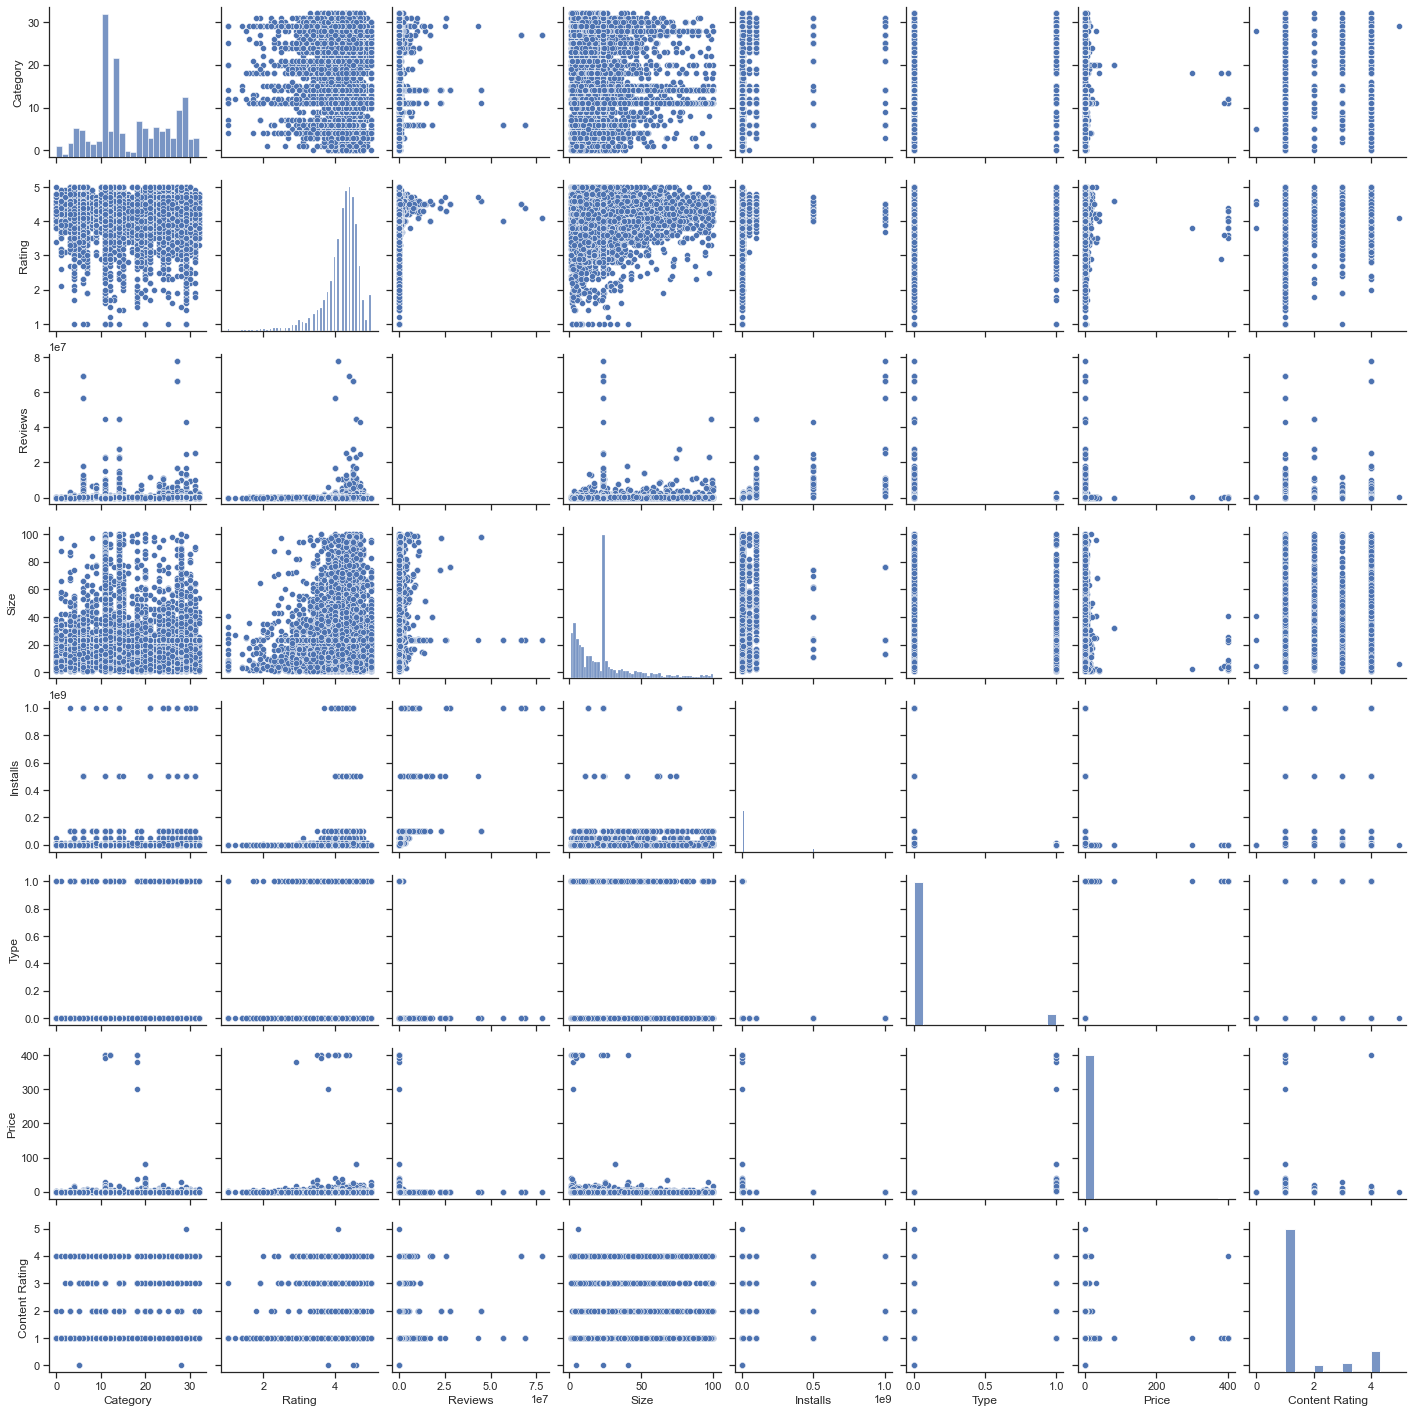

In [26]:
sns.pairplot(data_new)

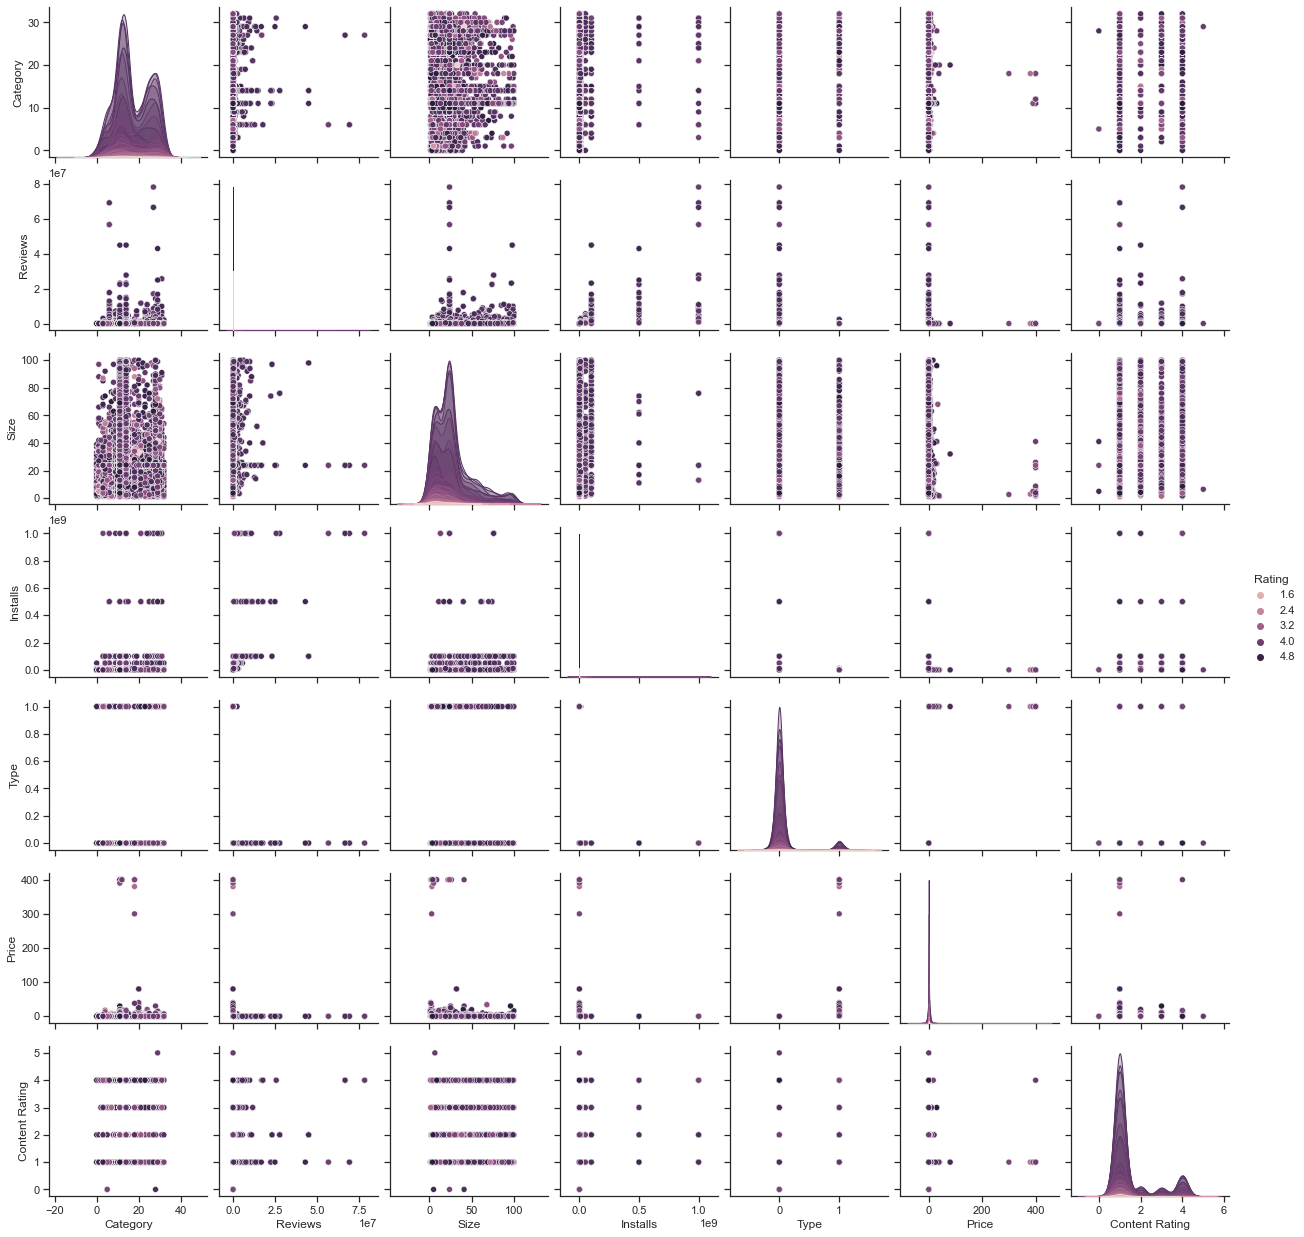

In [27]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data_new, hue='Rating')

## По результатам кореляционного анализа и диаграммам можно сделать выводы:

1. Параметр количества загрузок корелирует с количеством отзывов

2. Средняя оценка приложения ~ 4.6

3. Параметр Size слабо связан с параметрами Category и Reviews - это видно и на диаграммах, и по значению в районе 0.1

4. Параметр Type слабо корелирует с параметром Price (очевидно)

Вывод: в модели данных существует всего одна сильная кореляция, для Installations-Reviews. Построить хорошую модель будет сложно, т.к. большинство параметров не корелирует между собой